#### 一、Python

In [4]:
import numpy as np
X = np.array([[51, 55], [14, 19], [0, 4]])
print(X)

# 
X = np.array([[[1, 1 ], [2, 2 ] ], [[3, 3 ], [4, 4 ] ] ])
print(X)

X = X * np.array([10, 20 ])
print(X)
# 广播：看来还是会锁定最小的变量进行广播
# 广播有最小变量限制：X = np.array([[[1, 1, 1 ], [2, 2, 2 ] ], [[3, 3, 3 ], [4, 4, 4 ] ] ]) 不可

for row in X:
    print("row: ", end = "")
    print(row)

[[51 55]
 [14 19]
 [ 0  4]]
[[[1 1]
  [2 2]]

 [[3 3]
  [4 4]]]
[[[10 20]
  [20 40]]

 [[30 60]
  [40 80]]]
row: [[10 20]
 [20 40]]
row: [[30 60]
 [40 80]]


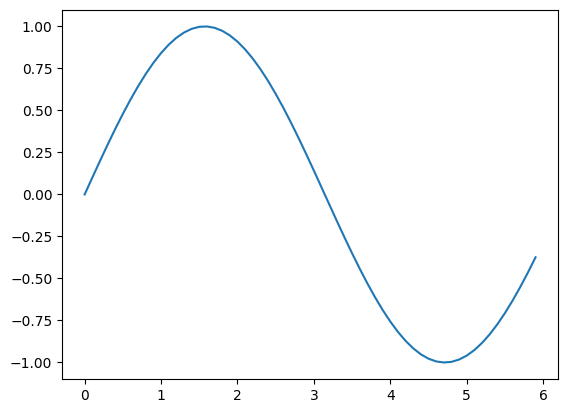

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# 生成数据
x = np.arange(0, 6, 0.1) # 以 0.1为单位，生成 0到 6的数据
y = np.sin(x)
# 绘制图形
plt.plot(x, y)
plt.show()

#### 二、感知机

 1、感知机模型：与、或、非 均是线性逻辑可以用单层感知机直接表示
 
 2、感知机的结构：异或是非线性逻辑，需要多层感知机表示 -- 由与或非组成的组合逻辑，对应为多层感知机，-- 可以模拟高级函数
 
 ！！！ 原本二次函数也好，其他函数也好，都是将别的函数输出作为输入进行运算，这与感知机层次结合没有本质差别
 
 ！！！ 高级函数可以分割空间，高维度的空间，非常高维度的函数，维度高到一般的数学直觉难以想象，所谓的智能就是表示数据到高维度，从而判断

#### 计算模型：神经网络算法 -- 深度学习
前向传播(算法模型结构) + 损失函数

反向传播 + 优化方法(优化器)

#### 理解数据表示的基础数据量以及计算过程中的计算转化量是理解AI算法的关键

#### 三、计算模型：神经网络

1、神经网络要求激活函数为各种函数，足够高纬度表示的函数，e^x，因为简单线性叠加层次后得到的都是普通的线性函数，
    需要变换接口运算才能实现更高级的变换从而得到更加高级的函数

！！！ 线性函数加深层后仍然为线性函数，阶跃函数和sigmod函数都是非线性

2、层次运算转化为矩阵运算：（x1, .., xn）* (wi1, .., win) = bi, (w化为矩阵则相应的b化为向量)

In [24]:
## 3、三层神经网络的封装
# 计算模型：激活函数
def step_function(x):
    y = x > 0
    return y.astype(np.int)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def relu(x):
    return np.maximum(0, x)

# 计算模型：输出层激活函数 -- 取决于问题类型：分类，回归
def identity_function(x):
    return x

def softmax(a):
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

## ！！！ 计算机中计算的实现要充分考虑误差，如softmax的实现
def init_network():
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    return network
def forward(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = identity_function(a3)
    return y
network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y) # [ 0.31682708 0.69627909]

[0.31682708 0.69627909]


In [18]:
## 4、手写数学识别 - 数据加载
import sys, os
sys.path.append(os.pardir) # 为了导入父目录中的文件而进行的设定
from dataset.mnist import load_mnist

# 第一次调用会花费几分钟 ……
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False, one_hot_label=False)
# (x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False, one_hot_label=False) # one_hot: 转换结果标签
# one_hot形式 7 对应 [0, 0, 0, 0, 0, 0, 1, 0, 0 ]

# 输出各个数据的形状
print(x_train.shape) # (60000, 784)
print(t_train.shape) # (60000,)
print(x_test.shape) # (10000, 784)
print(t_test.shape) # (10000,)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [19]:
## 4、手写数学识别 - 数据：查看图像
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist
from PIL import Image
def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)
img = x_train[0]
label = t_train[0]

print(label) # 5
print(img.shape) # (784,)
# img_show(img.reshape(8, 98) )

img = img.reshape(28, 28) # 把图像的形状变成原来的尺寸
print(img.shape) # (28, 28)

# img_show(img)

5
(784,)
(28, 28)


In [25]:
## 4、手写数学识别 - 计算模型：推理
import pickle

def get_data():
    (x_train, t_train), (x_test, t_test) = \
        load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test

def init_network():
    with open("sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    return network

def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)
    return y
    
x, t = get_data()
network = init_network()

accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y) # 获取概率最高的元素的索引
    if p == t[i]:
        accuracy_cnt += 1

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352


In [26]:
## 4、手写数学识别 - 计算模型：批处理
x, t = get_data()

network = init_network()

accuracy_cnt = 0
batch_size = 100 # 批数量
for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == t[i:i+batch_size])

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352


#### 四、损失函数：神经网络的学习

#### 五、优化器：误差反向传播法

#### 六、调参：与学习相关的技巧

#### 七、计算模型：卷积神经网络